In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-and-fake-news-dataset/news.csv


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



In [3]:
df = pd.read_csv('/kaggle/input/real-and-fake-news-dataset/news.csv')
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
#get labels and features 
labels = df.label
features = df.text

In [8]:
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [9]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [10]:
params = {'max_iter' : [50, 100, 150, 200], 'early_stopping' : [True, False], 'validation_fraction': [0.1, 0.2, 0.3]}

gscv = GridSearchCV(PassiveAggressiveClassifier(), params)

gscv.fit(X_train, Y_train)

gscv.best_estimator_

PassiveAggressiveClassifier(max_iter=200)

In [11]:
gscv.best_params_

{'early_stopping': False, 'max_iter': 200, 'validation_fraction': 0.1}

In [12]:
Y_hat = gscv.predict(X_test)

In [13]:
accuracy_score(Y_test, Y_hat)

0.9329123914759274

In [14]:
confusion_matrix(Y_test, Y_hat, labels = ['FAKE', 'REAL'])

array([[585,  43],
       [ 42, 597]])

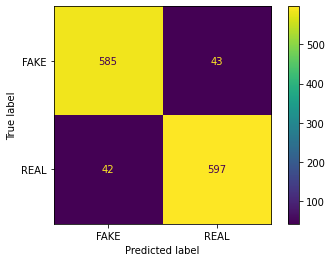

In [16]:
#plotting the confusion matrix
plot_confusion_matrix(gscv, X_test, Y_test)
plt.show()

Using the Passive Aggressive classifier we were able to reach an accuracy score of 93.3%. The confusion matrix also shows that we have 43 false negatives and 42 false positives. We'll make improvements in future rounds! 